In [1]:
import cv2 as cv

In [2]:
#read the image
img = cv.imread("fractal2.jpg")

## Blurring Techniques 

In [3]:
#Avaraging 
#This is new pixel is avaraging the ather kernal pixels
avarage = cv.blur(img,(5,5))
cv.imshow("blur",avarage)
cv.waitKey(0)

-1

In [4]:
# Gaussian Blur
gauss = cv.GaussianBlur(img,(7,7),0)
cv.imshow("Gaussian", gauss)
cv.waitKey(0)

-1

In [5]:
# Median Blur
# Litte bit same think avaraging
median = cv.medianBlur(img,7)
cv.imshow("median", median)
cv.waitKey(0)

-1

In [6]:
#Bilateral
bilateral = cv.bilateralFilter(img, 5, 15, 15)
cv.imshow("median", bilateral)
cv.waitKey(0)

-1

## Bitwise operations

In [3]:
import numpy as np

In [8]:
blank = np.zeros((400,400), dtype = "uint8")
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle =cv.circle(blank.copy(), (200,200), 200, 255, -1)
cv.imshow("rectangle", rectangle)
cv.imshow("circle", circle)
cv.waitKey(0)

-1

In [9]:
# bitwise AND --> intersecting regions
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow("bitwise_and", bitwise_and)
cv.waitKey(0)

-1

In [10]:
# bitwise OR --> non intersecting and intersecting regions
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow("bitwise_or", bitwise_or)
cv.waitKey(0)

-1

In [11]:
# bitwise XOR --> non intersecting region
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow("bitwise_xor", bitwise_xor)
cv.waitKey(0)

-1

In [12]:
# bitwise NOT
bitwise_not = cv.bitwise_not(circle)
cv.imshow("bitwise_not", bitwise_not)
cv.waitKey(0)

-1

## Masking

In [13]:
blank = np.zeros(img.shape[:2], dtype = "uint8")
cv.imshow("blank", blank)
mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow("Mask", mask)

#make masking
masked = cv.bitwise_and(img,img,mask = mask)
cv.imshow("Masked", masked)
cv.waitKey(0)

-1

## Histogram Computation

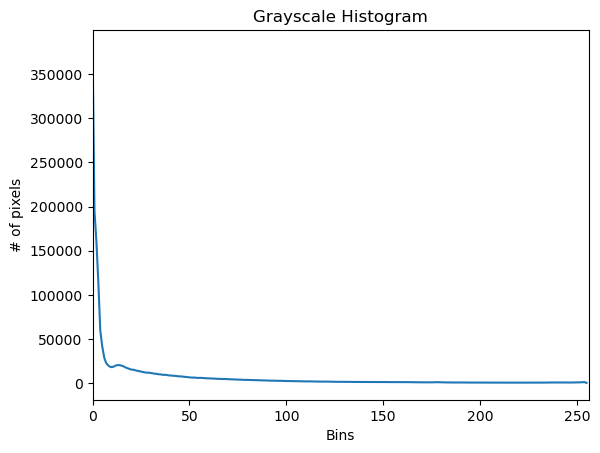

In [4]:
import matplotlib.pyplot as plt
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("gray", gray)
cv.waitKey(0)

#Grayscale histogram
gray_hist = cv.calcHist([gray], [0], None, [256],[0,256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()


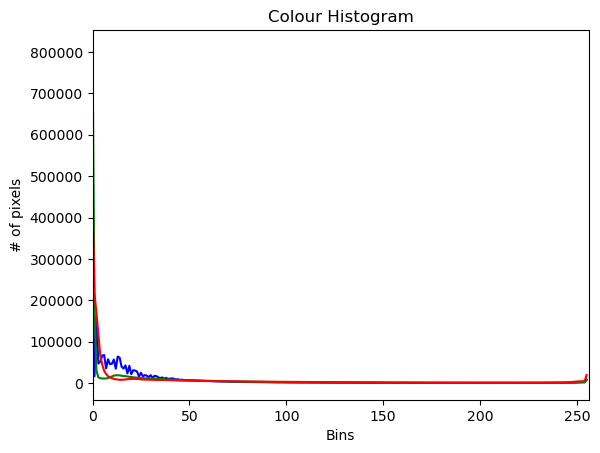

-1

In [19]:
#Colour Histogram

colors = ("b","g","r")


plt.figure()
plt.title("Colour Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
plt.show()   
cv.waitKey(0)

## Thresholding / Binarazing images

In [6]:
# Simple Thresholding
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
threshold, thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)
cv.imshow("Simple Threshhold",thresh)
cv.waitKey(0)

-1

In [7]:
#inverse
threshold, thresh_inv = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV)
cv.imshow("Simple Threshhold",thresh_inv)
cv.waitKey(0)

-1

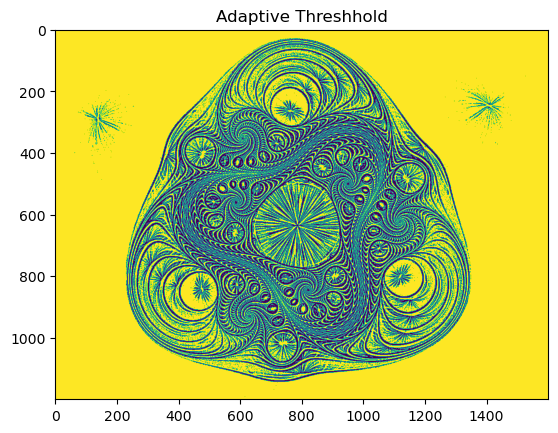

In [11]:
# Adaptive Threshholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3)
#cv.imshow("Adaptive Threshhold",adaptive_thresh)
#cv.waitKey(0)

plt.title("Adaptive Threshhold")
plt.imshow(adaptive_thresh)
plt.show()

## Edge Detection

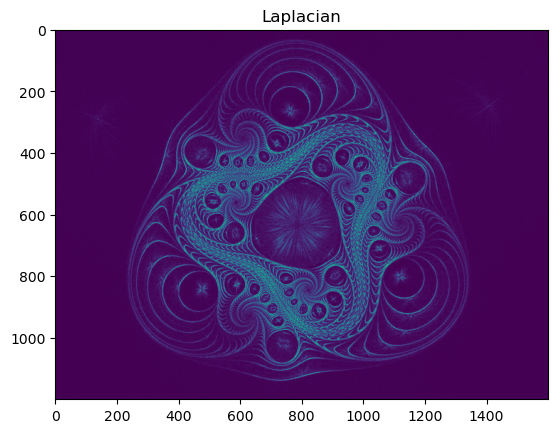

In [17]:
# Laplacian
lap = cv.Laplacian(gray,cv.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.title("Laplacian")
plt.imshow(lap)
plt.show()

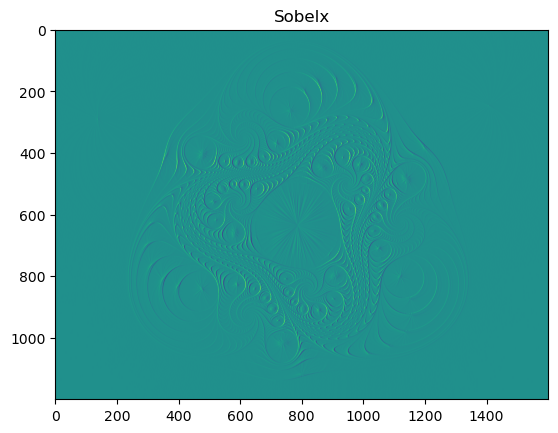

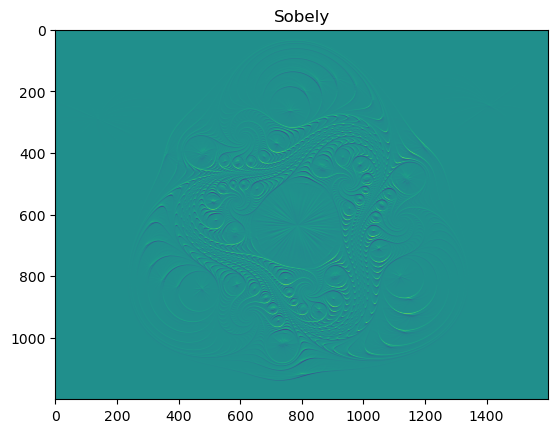

In [20]:
# Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
plt.title("Sobelx")
plt.imshow(sobelx)
plt.show()
plt.title("Sobely")
plt.imshow(sobely)
plt.show()

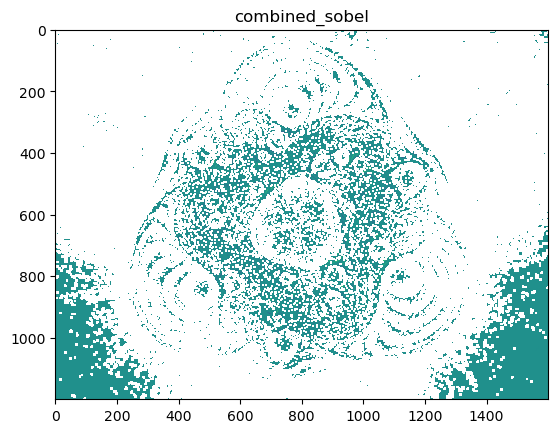

In [21]:
combined_sobel = cv.bitwise_or(sobelx,sobely)
plt.title("combined_sobel")
plt.imshow(combined_sobel)
plt.show()

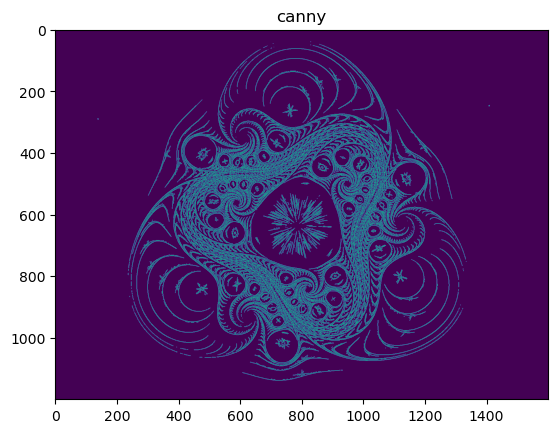

In [22]:
canny = cv.Canny(gray, 150, 175)
plt.title("canny")
plt.imshow(canny)
plt.show()